### Project 2020
###### Machine Learning and Statistics
###### Submission Date: January 8th, 2021

#### Instructions
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

(0.0, 130.0)

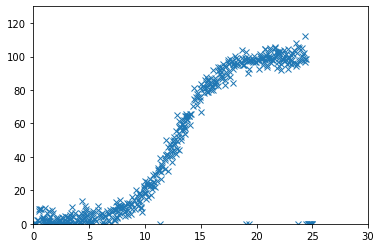

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
from tensorflow import keras as kr
from tensorflow.keras import layers
input_file = "powerproduction.csv"

# comma delimited is the default
df = pd.read_csv(input_file, header = 0)

original_headers = list(df.columns.values)

df = df._get_numeric_data()

numeric_headers = list(df.columns.values)


numpy_array = df.to_numpy()
X = numpy_array
# Plot the data set.
plt.plot(X[:,0], X[:,1], 'x')
# Set reasonable limits.
plt.xlim([0,30])
plt.ylim([0,130])

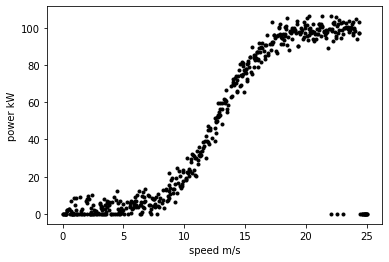

In [2]:
a, m, n, t = 100.0, 20.0, 1200.0, 1.8

x = np.linspace(0.0, 25.0, 1000)

x = x[np.sort(np.random.choice(len(x), size=len(x) // 2, replace=False))]

e = np.random.normal(0.0, 4.0, len(x))

y = a * ((1.0 + m * np.exp(-x / t)) / (1.0 + n * np.exp(-x / t)))
y = y + e

y[y < 0] = 0.0
y[x <= 0.3] = 0.0

y[x >= 24.4] = 0.0

y[np.sort(np.random.choice(len(y), size=len(y) // 100, replace=False))] = 0.0

fig = plt.figure()
plt.plot(x, y, 'k.')
plt.xlabel(r"speed m/s")
plt.ylabel(r"power kW")

df = pd.DataFrame({"speed": x, "power": y})
df.to_csv("powerproduction.csv", index=False, float_format='%.3f')

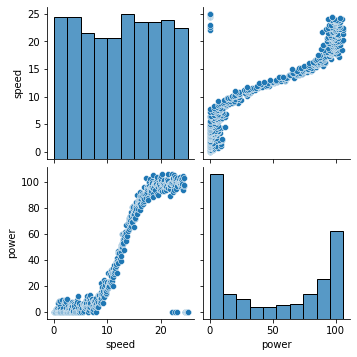

In [3]:
import seaborn as sns
sns.pairplot(df)

In [4]:
def f(x, p):
    return p[0] + x * p[1]

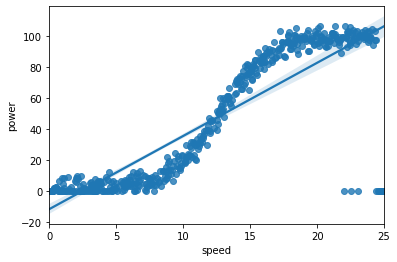

In [5]:
windspeed = df[["speed", "power"]].dropna()
sns.regplot(x="speed", y="power", data=df)

In [6]:
import sklearn.linear_model as lin

x = windspeed["power"].to_numpy()
y = windspeed["speed"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
i = model.intercept_
c = model.coef_
r= model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [7]:
i

5.574317858079665

In [8]:
c

array([0.14613393])

In [9]:
r

0.6882990575129228

In [10]:
p

[5.574317858079665, 0.14613392692580268]

In [11]:
f(70.0, p)

15.803692742885852

In [12]:
def predict(x):
    return f(x,p)

In [13]:
predict(70.0)

15.803692742885852

ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=2, found ndim=1. Full shape received: (500,)

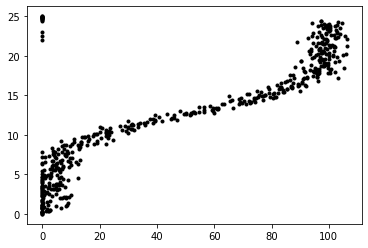

In [14]:
plt.plot(x, y, 'k.')

In [15]:
f = lambda x: 3.0 * x + 1.0

In [16]:
from sklearn.model_selection import train_test_split
X_train20, X_test20 = train_test_split(x, test_size=0.20)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting the 80% Training to the scaler.
scaler.fit(X_train20)

X_train = scaler.transform(X_train20)
X_test = scaler.transform(X_test20)
Y_train = f(X_train)
Y_test = f(X_test)

In [18]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [19]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 5ms/step - loss: 5.0610
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 4.8977
Epoch 3/500
13/13 [==============================] - 0s 1ms/step - loss: 4.7766
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 4.9701
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 4.9944
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1780
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 4.8139
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 4.4629
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 4.5053
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 4.1214
Epoch 11/500
13/13 [==============================] - 0s 2ms/step - loss: 4.3147
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 4.2363
Epoch 13/500
13/13 [=================

13/13 [==============================] - 0s 1ms/step - loss: 0.8417
Epoch 103/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8201
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8186
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 0.8086
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7582
Epoch 107/500
13/13 [==============================] - 0s 2ms/step - loss: 0.7651
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7603
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 0.7295
Epoch 110/500
13/13 [==============================] - 0s 2ms/step - loss: 0.7071
Epoch 111/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6926
Epoch 112/500
13/13 [==============================] - 0s 1ms/step - loss: 0.6835
Epoch 113/500
13/13 [==============================] - 0s 2ms/step - loss: 0.6476
Epoch 114/500
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 0.0642
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0636
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0598
Epoch 203/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0584
Epoch 204/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 205/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0525
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0534
Epoch 207/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0506
Epoch 208/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 209/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0470
Epoch 210/500
13/13 [==============================] - 0s 1ms/step - loss: 0.0451
Epoch 211/500
13/13 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 212/500
13/13 [=========

13/13 [==============================] - 0s 2ms/step - loss: 5.4183e-04
Epoch 300/500
13/13 [==============================] - 0s 2ms/step - loss: 5.4043e-04
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 4.8730e-04
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 4.5565e-04
Epoch 303/500
13/13 [==============================] - 0s 2ms/step - loss: 4.2661e-04
Epoch 304/500
13/13 [==============================] - 0s 2ms/step - loss: 4.1536e-04
Epoch 305/500
13/13 [==============================] - 0s 1ms/step - loss: 3.7516e-04
Epoch 306/500
13/13 [==============================] - 0s 1ms/step - loss: 3.5954e-04
Epoch 307/500
13/13 [==============================] - 0s 2ms/step - loss: 3.2366e-04
Epoch 308/500
13/13 [==============================] - 0s 1ms/step - loss: 3.0670e-04
Epoch 309/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7956e-04
Epoch 310/500
13/13 [==============================] - 0s 1ms/step -

13/13 [==============================] - 0s 2ms/step - loss: 9.0662e-08
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 7.6682e-08
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 6.9059e-08
Epoch 397/500
13/13 [==============================] - 0s 2ms/step - loss: 5.9248e-08
Epoch 398/500
13/13 [==============================] - 0s 2ms/step - loss: 5.5172e-08
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 4.6475e-08
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 4.1018e-08
Epoch 401/500
13/13 [==============================] - 0s 2ms/step - loss: 3.6358e-08
Epoch 402/500
13/13 [==============================] - 0s 1ms/step - loss: 3.1678e-08
Epoch 403/500
13/13 [==============================] - 0s 1ms/step - loss: 2.7584e-08
Epoch 404/500
13/13 [==============================] - 0s 2ms/step - loss: 2.2684e-08
Epoch 405/500
13/13 [==============================] - 0s 1ms/step -

13/13 [==============================] - 0s 1ms/step - loss: 1.9325e-10
Epoch 489/500
13/13 [==============================] - 0s 1ms/step - loss: 1.8397e-10
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 1.8550e-10
Epoch 491/500
13/13 [==============================] - 0s 1ms/step - loss: 1.7242e-10
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 1.6186e-10
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 1.6009e-10
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 1.6768e-10
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 1.6820e-10
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 1.6202e-10
Epoch 497/500
13/13 [==============================] - 0s 2ms/step - loss: 1.6513e-10
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 1.6970e-10
Epoch 499/500
13/13 [==============================] - 0s 1ms/step -

In [45]:
from sklearn.metrics import mean_squared_error
pred_train_linreg = model(X_train)
np.sqrt(mean_squared_error(pred_train_linreg,Y_train))

1.2134453126083848e-05

In [44]:
pred_test_linreg = model(X_test)
np.sqrt(mean_squared_error(pred_test_linreg,Y_test))

1.2005776014688753e-05

In [47]:
pred_ytrain_linreg = model(Y_train)
np.sqrt(mean_squared_error(pred_ytrain_linreg,X_train))

8.944233860916569

In [49]:
pred_ytest_linreg = model(Y_test)
np.sqrt(mean_squared_error(pred_ytest_linreg,X_test))

8.586163737905213

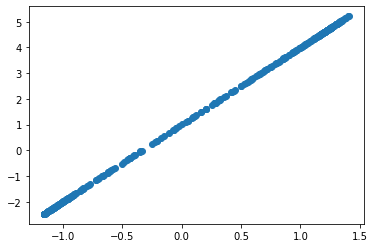

In [52]:
plt.scatter(X_train, Y_train)

c:\users\suppo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


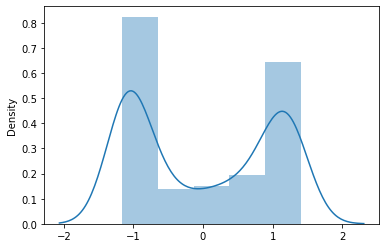

In [56]:
sns.distplot(X_train)

In [ ]:
model.predict([5.0,10.0,15.0,20.0])

In [ ]:
np.array([[f(i)] for i in [5.0, 10.0, 15.0, 20.0]])

In [ ]:
plt.plot(X_test, Y_test, label='actual')
plt.plot(X_test, model.predict(X_test), label='prediction')
plt.legend();

In [ ]:
model.evaluate(X_test, Y_test)

### References

[1] GMIT, “Quality assurance framework,”
https://www.gmit.ie/general/quality-assurance-framework.

[2] I. McLoughlin, “Using git for assessments,”
https://github.com/ianmcloughlin/using-git-for-assessments/.

[3]
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://www.sciencedirect.com/science/article/abs/pii/S0196890419308052

https://keras.io/examples/vision/mnist_convnet/

https://github.com/ianmcloughlin/project-2020/blob/main/train-model.ipynb